## FODFT Test Run - Notebook

In [10]:
# Imports
from couplings.dimerobject import DimerObject
# from couplings.molfodft import MolFODFT

ModuleNotFoundError: No module named 'couplings'

In [6]:
# Create dimer object from .xyz file
benzene_struct = "benzene_mol.xyz"
benzene_dimer = DimerObject(benzene_struct, t=[0,0,5.0])


In [ ]:
# Create FODFT object
benz_fodft = MolFODFT(benzene_dimer)


In [10]:
# First calculate the Hamiltonian and Overlap matrix, for a given functional and basis
benz_fodft.calculate_HS("PBE", "dzp")

Calculated HS matrices for benzene_mol at distance 5.0 with xc: PBE and basis: dzp


In [11]:
# Calculate the Hamiltonian and Overlap matrix, for a given functional and basis
benz_fodft.calculate_HS("LDA", "dzp")

Calculated HS matrices for benzene_mol at distance 5.0 with xc: LDA and basis: dzp


In [12]:
# Now calculate the H_dimer_prime and overlaps for the two fragments 
benz_fodft.calculate_couplings_matrix("PBE","dzp")
benz_fodft.calculate_couplings_matrix("LDA","dzp")

Calculating and building the block-diagonal Hamiltonian
Calculating and building the block-diagonal Hamiltonian


In [13]:
benz_fodft.get_couplings("PBE", "dzp", 16, 16)
print("")
benz_fodft.get_couplings("LDA", "dzp", 16, 16)
# print("")
# benz_fodft.get_couplings("GLLBSC", "dzp", 16, 16)

Getting couplings directly from stored diabats
Hab_fo: -0.03417545158462063 eV 
Site energy acceptor: -0.9124506058217634 eV 
Site energy donor: -0.9124506058218215 eV

Getting couplings directly from stored diabats
Hab_fo: -0.034571701742674404 eV 
Site energy acceptor: -1.1265039976320719 eV 
Site energy donor: -1.126503997632144 eV


(-0.034571701742674404, -1.1265039976320719, -1.126503997632144)

#### Or, just go directly for get_couplings

In [4]:
benz_fodft.get_couplings("LDA", "dzp", 16, 16)

No diabats are stored for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance 5.0 
 Calculating HS matrices first
HS matrices for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance: 5.0 does not exist.
 This will be done first
Calculated HS matrices for benzene_mol at distance 5.0 with xc: LDA and basis: dzp
Hab_fo: -0.034571701742674404 eV 
Site energy acceptor: -1.1265039976320719 eV 
Site energy donor: -1.126503997632144 eV


(-0.034571701742674404, -1.1265039976320719, -1.126503997632144)

### Doing some looping and working the CPU

In [15]:
# List of intermolecular distances
distances = [3, 3.5, 4, 4.5, 5.0]

# Functionals xc: 
# Known to work -> LDA, PBE, GLLBSC
functionals = ["LDA", "PBE"]#, "GLLBSC"]

# Basis sets 
# Only dzp :'(
basis_sets = ["dzp"]


# Set up some data storage
HOMO_couplings = {}
for xc in functionals:
    for basis in basis_sets:
        HOMO_couplings[xc+basis] = {"dist": [], "Hab_fo": [], "E_site_A": [], "E_site_D": []}


In [ ]:
# This cell took ~3 min. locally - 

# Getting heavy 
benzene_struct = "benzene_mol.xyz"
HOMO_idx = 16

for i, distance in enumerate(distances):
    benzene_dimer = DimerObject(benzene_struct,t=[0,0, distance])

    benz_fodft = MolFODFT(benzene_dimer)

    for xc in functionals:
        for basis in basis_sets:
            Hab_fo, ea, ed = benz_fodft.get_couplings(xc, basis, HOMO_idx, HOMO_idx) # HOMO idx is 16

            HOMO_couplings[xc+basis]["dist"].append(distance)
            HOMO_couplings[xc+basis]["Hab_fo"].append(Hab_fo)
            HOMO_couplings[xc+basis]["E_site_A"].append(ea)
            HOMO_couplings[xc+basis]["E_site_D"].append(ed)
            





No diabats are stored for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance 3.0 
 Calculating HS matrices first
HS matrices for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance: 3.0 does not exist.
 This will be done first
Calculated HS matrices for benzene_mol at distance 3.0 with xc: LDA and basis: dzp
Hab_fo: -0.7420081210417734 eV 
Site energy acceptor: -1.0938733051392808 eV 
Site energy donor: -1.0938733051393257 eV
No diabats are stored for: 
 Functional: PBE 
 Basis: dzp 
 Dimer distance 3.0 
 Calculating HS matrices first
HS matrices for: 
 Functional: PBE 
 Basis: dzp 
 Dimer distance: 3.0 does not exist.
 This will be done first
Calculated HS matrices for benzene_mol at distance 3.0 with xc: PBE and basis: dzp
Hab_fo: -0.7202339746867721 eV 
Site energy acceptor: -0.8579433702996956 eV 
Site energy donor: -0.8579433702997225 eV
No diabats are stored for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance 3.5 
 Calculating HS matrices first
HS matrices for: 
 Functional: LDA 
 Ba

In [15]:
# Plot some data
import pandas as pd 
LDAdzp = pd.DataFrame(HOMO_couplings["LDAdzp"])
PBEdzp = pd.DataFrame(HOMO_couplings["PBEdzp"])

display(LDAdzp)
display(PBEdzp)

,dist,Hab_fo,E_site_A,E_site_D
0,3.0,-0.742008,-1.093873,-1.093873
1,3.5,-0.362635,-1.030229,-1.030229
2,4.0,-0.166880,-1.052058,-1.052058
3,4.5,-0.077821,-1.089917,-1.089917
4,5.0,-0.034572,-1.126504,-1.126504


,dist,Hab_fo,E_site_A,E_site_D
0,3.0,-0.720234,-0.857943,-0.857943
1,3.5,-0.348371,-0.805480,-0.805480
2,4.0,-0.160253,-0.834624,-0.834624
3,4.5,-0.075840,-0.876937,-0.876937
4,5.0,-0.034175,-0.912451,-0.912451


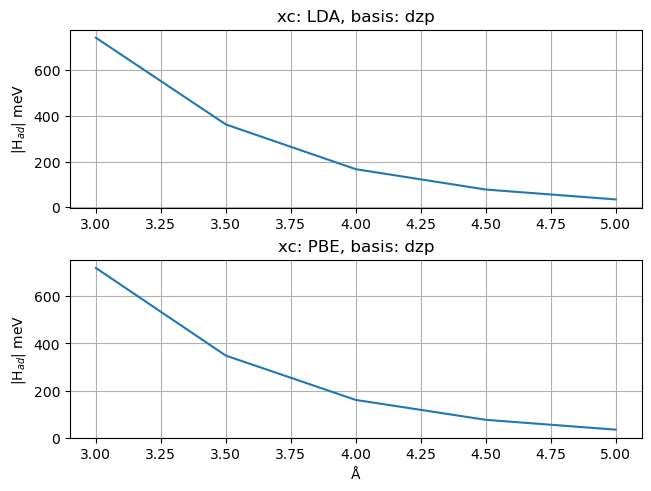

In [39]:
import matplotlib.pyplot as plt 
import numpy as np
# import seaborn as sns 

fig, ax = plt.subplots(2,1)

ax[0].plot(LDAdzp["dist"], abs(LDAdzp["Hab_fo"])*1000)
ax[0].set_ylabel("|H$_{ad}$| meV" )
ax[0].set_title("xc: LDA, basis: dzp")

ax[1].plot(PBEdzp["dist"], abs(PBEdzp["Hab_fo"])*1000 )
ax[1].set_ylabel("|H$_{ad}$| meV")
ax[1].set_title("xc: PBE, basis: dzp")
ax[1].set_xlabel("Å")

ax[0].grid()
ax[1].grid()
fig.set_constrained_layout(3)


## Try with Hydrogen

In [3]:
# Imports
from ..couplings.dimerobject import DimerObject
from ..couplings.molfodft import MolFODFT
from ase.visualize import view 
# Load structure
hydrogen = "H.xyz"
hydrogen_dimer = DimerObject(hydrogen,t=[0,0,2])
H2_fodft = MolFODFT(hydrogen_dimer)
print(hydrogen_dimer)
# view(hydrogen_dimer[0])

ImportError: attempted relative import with no known parent package

In [2]:
# Get couplings
H2_fodft.get_couplings("LDA", "dzp", 0, 0)

No diabats are stored for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance 2.0 
 Calculating HS matrices first
HS matrices for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance: 2.0 does not exist.
 This will be done first
Calculated HS matrices for H at distance 2.0 with xc: LDA and basis: dzp
Hab_fo: -1.2890080843490415 eV 
Site energy acceptor: -6.141285969844499 eV 
Site energy donor: -6.141285969844508 eV


(-1.2890080843490415,
 0.2356452190616505,
 -6.141285969844499,
 -6.141285969844508)

In [10]:
H2_fodft.get_couplings("PBE", "dzp", 1, 1)

No diabats are stored for: 
 Functional: PBE 
 Basis: dzp 
 Dimer distance 2.0 
 Calculating HS matrices first
HS matrices for: 
 Functional: PBE 
 Basis: dzp 
 Dimer distance: 2.0 does not exist.
 This will be done first
Calculated HS matrices for H2 at distance 2.0 with xc: PBE and basis: dzp
Hab_fo: -1.5301116136951278 eV 
Site energy acceptor: 0.9850716437736992 eV 
Site energy donor: 0.9850716437735834 eV


(-1.5301116136951278, 0.9850716437736992, 0.9850716437735834)

## Now we'll try the same plot as just done for benzene

In [ ]:
from couplings.dimerobject import DimerObject
from couplings.fodft import FODFT
# List of intermolecular distances
distances = [0.74, 0.84, 0.94, 1.04, 1.14, 10]

# Functionals xc: 
# Known to work -> LDA, PBE, GLLBSC
functionals = ["LDA", "PBE"]#, "GLLBSC"]

# Basis sets 
# Only dzp :'(
basis_sets = ["dzp"]


# Set up some data storage
HOMO_couplings = {}
for xc in functionals:
    for basis in basis_sets:
        HOMO_couplings[xc+basis] = {"dist": [], "Hab_fo": [], "Sab": [], "E_site_A": [], "E_site_D": []}


In [2]:
# This cell took ~1 min. locally - 

# Getting heavy 
H2 = "H.xyz"
HOMO_idx = 0

for i, distance in enumerate(distances):
    H2_dimer = DimerObject(H2,t=[0,0, distance])

    H2_fodft = FODFT(H2_dimer)

    for xc in functionals:
        for basis in basis_sets:
            Hab_fo, Sab, ea, ed = H2_fodft.get_couplings(xc, basis, HOMO_idx, HOMO_idx) # HOMO idx is 0

            HOMO_couplings[xc+basis]["dist"].append(distance)
            HOMO_couplings[xc+basis]["Hab_fo"].append(Hab_fo)
            HOMO_couplings[xc+basis]["Sab"].append(Sab)
            HOMO_couplings[xc+basis]["E_site_A"].append(ea)
            HOMO_couplings[xc+basis]["E_site_D"].append(ed)

            



No diabats are stored for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance 0.74 
 Calculating HS matrices first
HS matrices for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance: 0.74 does not exist.
 This will be done first
Calculated HS matrices for H at distance 0.74 with xc: LDA and basis: dzp
Hab_fo: -7.405870761815309 eV 
Site energy acceptor: -7.968857325880959 eV 
Site energy donor: -7.968857325880972 eV
No diabats are stored for: 
 Functional: PBE 
 Basis: dzp 
 Dimer distance 0.74 
 Calculating HS matrices first
HS matrices for: 
 Functional: PBE 
 Basis: dzp 
 Dimer distance: 0.74 does not exist.
 This will be done first
Calculated HS matrices for H at distance 0.74 with xc: PBE and basis: dzp
Hab_fo: -7.528899197825817 eV 
Site energy acceptor: -8.074258889684678 eV 
Site energy donor: -8.074258889684785 eV
No diabats are stored for: 
 Functional: LDA 
 Basis: dzp 
 Dimer distance 0.84 
 Calculating HS matrices first
HS matrices for: 
 Functional: LDA 
 Basis: dzp 
 Dimer di

In [ ]:
# Check distances in dictionary
# H2_H = H2_fodft.HS_matrices["PBE"]["dzp"][1.5]["dimer"]["H"]
# H2_S = H2_fodft.HS_matrices["PBE"]["dzp"][1.5]["dimer"]["S"]
# import scipy.linalg

# scipy.linalg.eigh(H2_H, H2_S)[0]
# H2_fodft.HS_matrices["PBE"]["dzp"]

# HOMO_couplings    


dict_keys(['LDAdzp', 'PBEdzp'])

In [3]:
# view(H2_dimer[0])
HOMO_couplings["LDAdzp"]

{'dist': [0.74, 0.84, 0.94, 1.04, 1.14],
 'Hab_fo': [-7.405870761815309,
  -6.39605738092557,
  -5.532801038018696,
  -4.793656327149564,
  -4.1597950396646945],
 'Sab': [0.7794572524386914,
  0.7298620548604156,
  0.6796543185615532,
  0.6295843549773668,
  0.5802792297969499],
 'E_site_A': [-7.968857325880959,
  -7.53730288135983,
  -7.191065336785861,
  -6.91674749234885,
  -6.701937635817214],
 'E_site_D': [-7.968857325880972,
  -7.537302881359836,
  -7.191065336785864,
  -6.91674749234884,
  -6.701937635817216]}

In [9]:
# Plot some data
import pandas as pd 

LDAdzp = pd.DataFrame(HOMO_couplings["LDAdzp"])
LDAdzp["Hab_fo"] = LDAdzp["Hab_fo"] * 0.03675
PBEdzp = pd.DataFrame(HOMO_couplings["PBEdzp"])

display(LDAdzp)
display(PBEdzp)

,dist,Hab_fo,Sab,E_site_A,E_site_D
0,0.74,-0.272166,0.779457,-7.968857,-7.968857
1,0.84,-0.235055,0.729862,-7.537303,-7.537303
2,0.94,-0.203330,0.679654,-7.191065,-7.191065
3,1.04,-0.176167,0.629584,-6.916747,-6.916747
4,1.14,-0.152872,0.580279,-6.701938,-6.701938


,dist,Hab_fo,Sab,E_site_A,E_site_D
0,0.74,-7.528899,0.771985,-8.074259,-8.074259
1,0.84,-6.485579,0.721078,-7.620058,-7.620058
2,0.94,-5.594920,0.669714,-7.259856,-7.259856
3,1.04,-4.833549,0.618670,-6.978903,-6.978903
4,1.14,-4.181849,0.568595,-6.763408,-6.763408


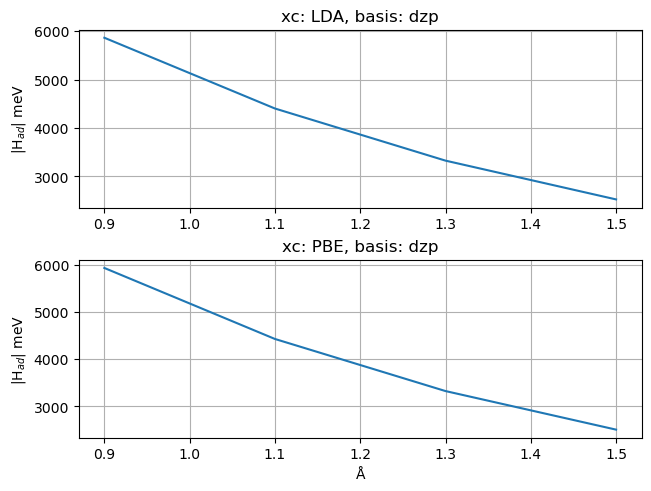

In [11]:
import matplotlib.pyplot as plt 
import numpy as np
# import seaborn as sns 

fig, ax = plt.subplots(2,1)

ax[0].plot(LDAdzp["dist"], abs(LDAdzp["Hab_fo"])*1000)
ax[0].set_ylabel("|H$_{ad}$| meV" )
ax[0].set_title("xc: LDA, basis: dzp")

ax[1].plot(PBEdzp["dist"], abs(PBEdzp["Hab_fo"])*1000 )
ax[1].set_ylabel("|H$_{ad}$| meV")
ax[1].set_title("xc: PBE, basis: dzp")
ax[1].set_xlabel("Å")

ax[0].grid()
ax[1].grid()
fig.set_constrained_layout(3)
